In [1]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [5]:
#importing all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
import cv2
from tensorflow.keras import layers, models
from pathlib import Path
import os

In [6]:
# Checking the directories available in datasets folder
datasets='/content/Drive/MyDrive/AI/DL/Plant Disease/Dataset'
os.listdir(datasets)

['test', 'train', 'valid']

In [7]:
batch_size=64

In [8]:
#data augmentation
from keras.preprocessing.image import ImageDataGenerator
# Create an instance of the ImageDataGenerator
trainDatagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=0.3,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5],  # Adjust brightness between 0.5 and 1.5
    fill_mode='nearest'
)

In [9]:
trainData = trainDatagen.flow_from_directory(
    directory='/content/Drive/MyDrive/AI/DL/Plant Disease/Dataset/train',
    class_mode='sparse',
    target_size=(224,224),
    batch_size=batch_size
)

Found 12820 images belonging to 17 classes.


In [10]:
trainData.class_indices

{'Maize___Cercospora_leaf_spot Gray_leaf_spot': 0,
 'Maize___Common_rust_': 1,
 'Maize___Northern_Leaf_Blight': 2,
 'Maize___healthy': 3,
 'Potato___Early_blight': 4,
 'Potato___Late_blight': 5,
 'Potato___healthy': 6,
 'Tomato___Bacterial_spot': 7,
 'Tomato___Early_blight': 8,
 'Tomato___Late_blight': 9,
 'Tomato___Leaf_Mold': 10,
 'Tomato___Septoria_leaf_spot': 11,
 'Tomato___Spider_mites Two-spotted_spider_mite': 12,
 'Tomato___Target_Spot': 13,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 14,
 'Tomato___Tomato_mosaic_virus': 15,
 'Tomato___healthy': 16}

In [11]:
testDatagen = ImageDataGenerator(rescale=1.0/255)
testData = testDatagen.flow_from_directory(
    directory='/content/Drive/MyDrive/AI/DL/Plant Disease/Dataset/test',
    class_mode='sparse',
    target_size=(224,224),
    batch_size=batch_size
)

Found 5765 images belonging to 17 classes.


In [12]:
validDatagen = ImageDataGenerator(rescale=1.0/255)
validData = validDatagen.flow_from_directory(
    directory='/content/Drive/MyDrive/AI/DL/Plant Disease/Dataset/valid',
    class_mode='sparse',
    target_size=(224,224),
    batch_size=batch_size
)

Found 6389 images belonging to 17 classes.


In [13]:
from tensorflow.keras.applications.vgg16 import VGG16

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [15]:
model = models.Sequential([
    base_model,
    # layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(224,224,3)),
	  # layers.BatchNormalization(),
    # layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    # layers.MaxPooling2D((2,2)),
    # layers.Dropout(0.2),
    # layers.Conv2D(32, (3,3), padding='same', activation='relu'),
	  # layers.BatchNormalization(),
    # layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    # layers.MaxPooling2D((2,2)),
    # layers.Dropout(0.3),
    # layers.Conv2D(64, (3,3), padding='same', activation='relu'),
	  # layers.BatchNormalization(),
    # layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    # layers.MaxPooling2D((2,2)),
    # layers.Dropout(0.3),
    # layers.Conv2D(128, (3,3), padding='same', activation='relu'),
	  # layers.BatchNormalization(),
    # layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    # layers.MaxPooling2D((2,2)),
    # layers.Dropout(0.3),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(17, activation='softmax'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 128)               3211392   
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 17)                561       
                                                                 
Total params: 17936977 (68.42 MB)
Trainable params: 32

In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Define callbacks
checkpoint = ModelCheckpoint('model_checkpoint.h5', save_best_only=True, monitor="val_accuracy", verbose=1)
early_stopping = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=3, verbose=1)

In [ ]:
r=model.fit(trainData, validation_data=validData, validation_steps=validData.samples // batch_size, steps_per_epoch=trainData.samples // batch_size, epochs=5, verbose =1, callbacks=[early_stopping, checkpoint])


Epoch 1/15
200/200 [==============================] - ETA: 0s - loss: 1.6211 - accuracy: 0.4784 
Epoch 1: val_accuracy improved from -inf to 0.71449, saving model to model_checkpoint.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


200/200 [==============================] - 8602s 43s/step - loss: 1.6211 - accuracy: 0.4784 - val_loss: 0.8851 - val_accuracy: 0.7145
Epoch 2/15
200/200 [==============================] - ETA: 0s - loss: 0.8789 - accuracy: 0.7095
Epoch 2: val_accuracy improved from 0.71449 to 0.77446, saving model to model_checkpoint.h5
200/200 [==============================] - 273s 1s/step - loss: 0.8789 - accuracy: 0.7095 - val_loss: 0.6812 - val_accuracy: 0.7745
Epoch 3/15
200/200 [==============================] - ETA: 0s - loss: 0.7062 - accuracy: 0.7627
Epoch 3: val_accuracy did not improve from 0.77446
200/200 [==============================] - 270s 1s/step - loss: 0.7062 - accuracy: 0.7627 - val_loss: 0.7239 - val_accuracy: 0.7514
Epoch 4/15
200/200 [==============================] - ETA: 0s - loss: 0.6320 - accuracy: 0.7862
Epoch 4: val_accuracy improved from 0.77446 to 0.80587, saving model to model_checkpoint.h5
200/200 [==============================] - 267s 1s/step - loss: 0.6320 - accura

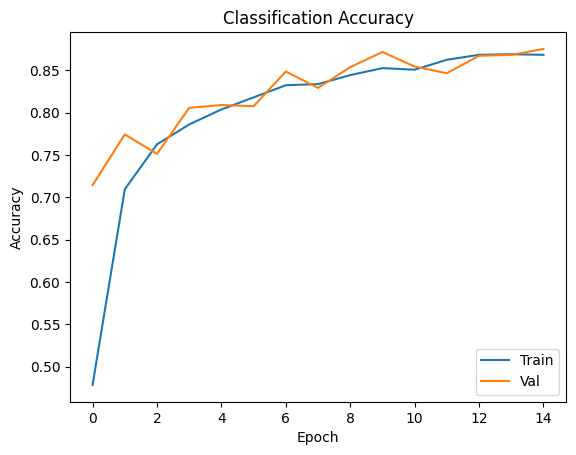

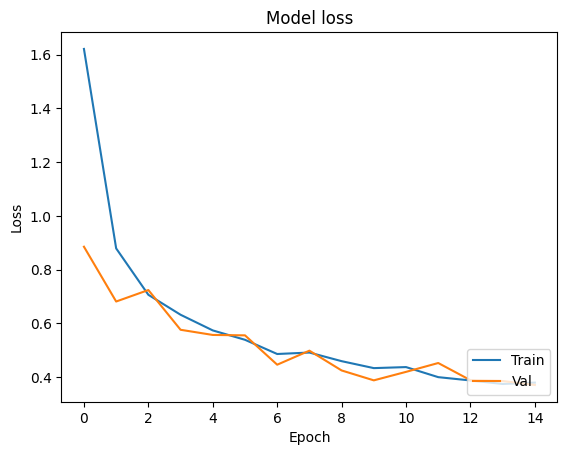

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
test_model=load_model('model.h5')
test_model.evaluate(testData)

91/91 [==============================] - 1273s 14s/step - loss: 0.5957 - accuracy: 0.7912


[0.5957226157188416, 0.7911534905433655]